In [22]:
import pandas as pd
import numpy as np
# from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping

import cv2
import os
import tensorflow as tf
import random
from tensorflow import keras
# from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
import matplotlib.image as mpimg
import random

In [23]:
plt.figure(figsize=(20,20))

DATADIR=r"/home/netrunner/Music/img_folder2"
# Categories=["97.3","97.5","97.9","98.0","98.5"]
Categories=["96","97","98","99","100"]

<Figure size 1440x1440 with 0 Axes>

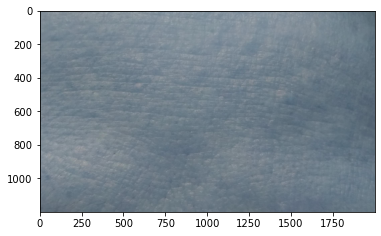

In [24]:
for category in Categories:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break 
    break

In [25]:
print(img_array.shape)

(1200, 2000, 3)


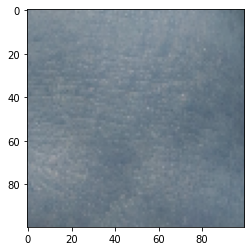

In [26]:
IMG_SIZE= 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [27]:
training_data = []

def create_training_data():
    for category in Categories:
        path=os.path.join(DATADIR, category)
        class_number= Categories.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_number])

#             first com
            
create_training_data()

In [28]:
print(len(training_data))

25


In [29]:
random.shuffle(training_data)

In [30]:
# takes long time so disable when not needed
# for sample in training_data:
#     print(sample[1])
    

In [31]:
#feature set
X=[]

#Label
Y=[]

In [32]:
for features, label in training_data:
    X.append(features)
    Y.append(label)

    
X=np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [33]:
Y

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4]

In [34]:
# Saving the Model
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [35]:
 # to read saved data
pickle_in = open("X.pickle", "rb")
X= pickle.load(pickle_in)

In [36]:
# X[1]